---
#### Preliminaries

In [ ]:
%%capture

# 1: Install the dependencies

!pip install python-arango # The ArangoDB Python Driver
!pip install adb-cloud-connector # The ArangoDB Cloud Instance provisioner
!pip install arango-datasets # Datasets package

In [ ]:
# 2. Helper Function Definitions

import json

def pprint(data):
  print(json.dumps(data, indent=4))

def query(db, aql):
  pprint(list(db.aql.execute(aql)))

In [ ]:
# 3. Provisioning ArangoDB

from adb_cloud_connector import get_temp_credentials

credentials = get_temp_credentials(tutorialName="ArangoDB101")

pprint(credentials)

Log: requesting new credentials...
Succcess: new credentials acquired
{
    "dbName": "TUTbrywuvdkur1l2bowh443i",
    "username": "TUTty03uumo2smtiswqnt7zk9",
    "password": "TUTv1hx1qfu63qi9bpc9d40dn",
    "hostname": "tutorials.arangodb.cloud",
    "port": 8529,
    "url": "https://tutorials.arangodb.cloud:8529"
}


In [ ]:
# 4. Connecting to ArangoDB

from arango import ArangoClient

client = ArangoClient(credentials["url"], request_timeout=None)

db = client.db(
    name=credentials["dbName"],
    username=credentials["username"],
    password=credentials["password"],
    verify=True
)

db

<StandardDatabase TUTbrywuvdkur1l2bowh443i>

---
#### Loading the data

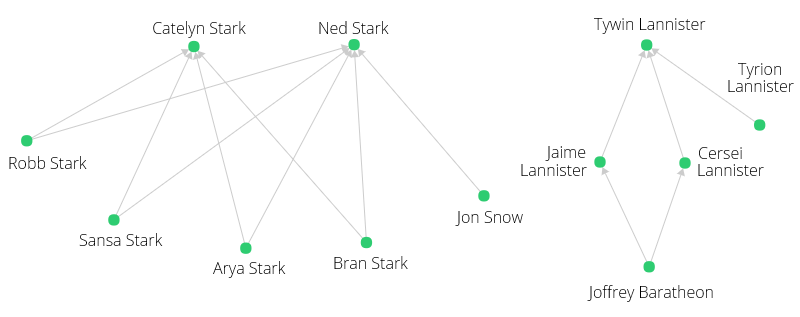

In [ ]:
# (13 nodes, 15 edges)

# This dataset represents the parent-child
# relationships of certain characters from the Game of Thrones universe

if db.has_graph("GameOfThrones"):
    db.delete_graph("GameOfThrones", drop_collections=True)


edge_definitions=[
    {
        "edge_collection": "ChildOf",
        "from_vertex_collections": ["Characters"],
        "to_vertex_collections": ["Characters"],
    }
]

documents = [
    # Starks (8)
    {"_key": "RickardStark", "name": "Rickard", "surname": "Stark", "alive": False, "age": 60, "gender": "male"},
    {"_key": "LyarraStark", "name": "Lyarra", "surname": "Stark", "alive": False, "age": 60, "gender": "female"},
    {"_key": "NedStark", "name": "Ned", "surname": "Stark", "alive": True, "age": 41, "gender": "male"},
    {"_key": "CatelynStark", "name": "Catelyn", "surname": "Stark", "alive": False, "age": 40, "gender": "female"},
    {"_key": "AryaStark", "name": "Arya", "surname": "Stark", "alive": True, "age": 11, "gender": "female"},
    {"_key": "BranStark", "name": "Bran", "surname": "Stark", "alive": True, "age": 10, "gender": "male"},
    { "_key": "RobbStark", "name": "Robb", "surname": "Stark", "alive": False, "age": 16, "gender": "male"},
    { "_key": "SansaStark", "name": "Sansa", "surname": "Stark", "alive": True, "age": 13, "gender": "female"},

    # Lannisters (4)
    { "_key": "TywinLannister", "name": "Tywin", "surname": "Lannister", "alive": False, "age": 67, "gender": "male" },
    { "_key": "JaimeLannister", "name": "Jaime", "surname": "Lannister", "alive": True, "age": 36, "gender": "male" },
    { "_key": "CerseiLannister", "name": "Cersei", "surname": "Lannister", "alive": True, "age": 36, "gender": "female" },
    { "_key": "TyrionLannister", "name": "Tyrion", "surname": "Lannister", "alive": True, "age": 32, "gender": "male" },

    # Baratheons (1)
    { "_key": "JoffreyBaratheon", "name": "Joffrey", "surname": "Baratheon", "alive": False, "age": 19, "gender": "male"},
]

edges = [
    {"_to": "Characters/NedStark", "_from": "Characters/BranStark"},
    {"_to": "Characters/NedStark", "_from": "Characters/RobbStark" },
    {"_to": "Characters/NedStark", "_from": "Characters/SansaStark" },
    {"_to": "Characters/NedStark", "_from": "Characters/AryaStark" },
    {"_to": "Characters/CatelynStark", "_from": "Characters/AryaStark"},
    {"_to": "Characters/CatelynStark", "_from": "Characters/BranStark"},
    {"_to": "Characters/CatelynStark", "_from": "Characters/RobbStark" },
    {"_to": "Characters/CatelynStark", "_from": "Characters/SansaStark" },
    {"_to": "Characters/RickardStark", "_from": "Characters/NedStark"},
    {"_to": "Characters/LyarraStark", "_from": "Characters/NedStark"},

    {"_to": "Characters/TywinLannister", "_from": "Characters/JaimeLannister" },
    {"_to": "Characters/TywinLannister", "_from": "Characters/CerseiLannister" },
    {"_to": "Characters/TywinLannister", "_from": "Characters/TyrionLannister" },
    {"_to": "Characters/CerseiLannister", "_from": "Characters/JoffreyBaratheon" },
    {"_to": "Characters/JaimeLannister", "_from": "Characters/JoffreyBaratheon" }
]

db.delete_graph("GameOfThrones", ignore_missing=True, drop_collections=True)
db.create_graph("GameOfThrones", edge_definitions)

db.collection("Characters").import_bulk(documents)
db.collection("ChildOf").import_bulk(edges)

{'error': False,
 'created': 15,
 'errors': 0,
 'empty': 0,
 'updated': 0,
 'ignored': 0,
 'details': []}

---
#### My First AQL Query

In [ ]:
aql = """
  FOR character IN Characters
    LIMIT 3
    RETURN character
"""

query(db, aql)

[
    {
        "_key": "RickardStark",
        "_id": "Characters/RickardStark",
        "_rev": "_g4WXEbu---",
        "name": "Rickard",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "male"
    },
    {
        "_key": "LyarraStark",
        "_id": "Characters/LyarraStark",
        "_rev": "_g4WXEbu--_",
        "name": "Lyarra",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "female"
    },
    {
        "_key": "NedStark",
        "_id": "Characters/NedStark",
        "_rev": "_g4WXEbu--A",
        "name": "Ned",
        "surname": "Stark",
        "alive": true,
        "age": 41,
        "gender": "male"
    }
]


---
#### More Queries

In [ ]:
# 1. Creating a vertex

aql = """
  INSERT {
    "_key": "JonSnow",
    "name": "Jon",
    "surname": "Snow",
    "alive": true,
    "age": 31,
    "gender": "male"
  } INTO Characters
"""

query(db, aql)

[]


In [ ]:
# 2. Creating an edge

aql = """
  INSERT {
    _from: "Characters/JonSnow",
    _to: "Characters/NedStark"
  } INTO ChildOf
"""

query(db, aql)

[]


In [ ]:
# 3. Updating a document

aql = """
  UPDATE "JonSnow" WITH { age: 32, foo: 'bar' } IN Characters
"""

query(db, aql)

[]


In [ ]:
# 4. Which characters are 60 or older?

aql = """
  FOR character IN Characters
    FILTER character.age >= 60
    RETURN character
"""

query(db, aql)

[
    {
        "_key": "RickardStark",
        "_id": "Characters/RickardStark",
        "_rev": "_g4WXEbu---",
        "name": "Rickard",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "male"
    },
    {
        "_key": "LyarraStark",
        "_id": "Characters/LyarraStark",
        "_rev": "_g4WXEbu--_",
        "name": "Lyarra",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "female"
    },
    {
        "_key": "TywinLannister",
        "_id": "Characters/TywinLannister",
        "_rev": "_g4WXEbu--H",
        "name": "Tywin",
        "surname": "Lannister",
        "alive": false,
        "age": 67,
        "gender": "male"
    }
]


In [ ]:
# 5. Who are the 2 youngest characters?

aql = """
  FOR character IN Characters
    SORT character.age ASC
    LIMIT 2
    RETURN character
"""

query(db, aql)

[
    {
        "_key": "BranStark",
        "_id": "Characters/BranStark",
        "_rev": "_g4WXEbu--E",
        "name": "Bran",
        "surname": "Stark",
        "alive": true,
        "age": 10,
        "gender": "male"
    },
    {
        "_key": "AryaStark",
        "_id": "Characters/AryaStark",
        "_rev": "_g4WXEbu--D",
        "name": "Arya",
        "surname": "Stark",
        "alive": true,
        "age": 11,
        "gender": "female"
    }
]


In [ ]:
# 5. How many characters are alive & how many are dead?

aql = """
  FOR character IN Characters
    COLLECT alive = character.alive WITH COUNT INTO num
    RETURN { alive, num }
"""

query(db, aql)

[
    {
        "alive": false,
        "num": 6
    },
    {
        "alive": true,
        "num": 8
    }
]


In [ ]:
# 6. Who are the children of Ned Stark?
# <Children> --> NedStark

aql = """
  WITH Characters
  FOR v IN 1..1 INBOUND 'Characters/NedStark' ChildOf
    RETURN v
"""

query(db, aql)

[
    {
        "_key": "JonSnow",
        "_id": "Characters/JonSnow",
        "_rev": "_g4WXE1i--_",
        "name": "Jon",
        "surname": "Snow",
        "alive": true,
        "age": 32,
        "gender": "male",
        "foo": "bar"
    },
    {
        "_key": "AryaStark",
        "_id": "Characters/AryaStark",
        "_rev": "_g4WXEbu--D",
        "name": "Arya",
        "surname": "Stark",
        "alive": true,
        "age": 11,
        "gender": "female"
    },
    {
        "_key": "SansaStark",
        "_id": "Characters/SansaStark",
        "_rev": "_g4WXEbu--G",
        "name": "Sansa",
        "surname": "Stark",
        "alive": true,
        "age": 13,
        "gender": "female"
    },
    {
        "_key": "RobbStark",
        "_id": "Characters/RobbStark",
        "_rev": "_g4WXEbu--F",
        "name": "Robb",
        "surname": "Stark",
        "alive": false,
        "age": 16,
        "gender": "male"
    },
    {
        "_key": "BranStark",
        "_id": 

In [ ]:
# 7. Who are the parents of Ned Stark?
# NedStark --> <Parents>

aql = """
  WITH Characters
  FOR v IN 1..1 OUTBOUND 'Characters/NedStark' ChildOf
    RETURN v
"""

query(db, aql)

[
    {
        "_key": "LyarraStark",
        "_id": "Characters/LyarraStark",
        "_rev": "_g4WXEbu--_",
        "name": "Lyarra",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "female"
    },
    {
        "_key": "RickardStark",
        "_id": "Characters/RickardStark",
        "_rev": "_g4WXEbu---",
        "name": "Rickard",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "male"
    }
]


In [ ]:
# 8. Who are the children & parents of Ned Stark?
# <Children> <-- NedStark --> <Parents>

aql = """
  WITH Characters
  FOR v IN 1..1 ANY 'Characters/NedStark' ChildOf
    RETURN v
"""

query(db, aql)

[
    {
        "_key": "JonSnow",
        "_id": "Characters/JonSnow",
        "_rev": "_g4WXE1i--_",
        "name": "Jon",
        "surname": "Snow",
        "alive": true,
        "age": 32,
        "gender": "male",
        "foo": "bar"
    },
    {
        "_key": "AryaStark",
        "_id": "Characters/AryaStark",
        "_rev": "_g4WXEbu--D",
        "name": "Arya",
        "surname": "Stark",
        "alive": true,
        "age": 11,
        "gender": "female"
    },
    {
        "_key": "SansaStark",
        "_id": "Characters/SansaStark",
        "_rev": "_g4WXEbu--G",
        "name": "Sansa",
        "surname": "Stark",
        "alive": true,
        "age": 13,
        "gender": "female"
    },
    {
        "_key": "RobbStark",
        "_id": "Characters/RobbStark",
        "_rev": "_g4WXEbu--F",
        "name": "Robb",
        "surname": "Stark",
        "alive": false,
        "age": 16,
        "gender": "male"
    },
    {
        "_key": "BranStark",
        "_id": 

In [ ]:
# 9. Who are the grandparents of Bran Stark?
# BranStark --> <Parents> --> <GrandParents>

aql = """
  WITH Characters
  FOR v IN 2..2 OUTBOUND 'Characters/BranStark' ChildOf
    RETURN v
"""

query(db, aql)

[
    {
        "_key": "LyarraStark",
        "_id": "Characters/LyarraStark",
        "_rev": "_g4WXEbu--_",
        "name": "Lyarra",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "female"
    },
    {
        "_key": "RickardStark",
        "_id": "Characters/RickardStark",
        "_rev": "_g4WXEbu---",
        "name": "Rickard",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "male"
    }
]


---
#### Exercises



##### Does Bran Stark have a dead parent?

In [ ]:
aql = """
  WITH Characters
  FOR ...
"""

# query(db, aql)

###### Solution

In [ ]:
aql = """
  WITH Characters
  FOR parent IN 1..1 OUTBOUND 'Characters/BranStark' ChildOf
    FILTER NOT parent.alive
    RETURN parent
"""

query(db, aql)

[
    {
        "_key": "CatelynStark",
        "_id": "Characters/CatelynStark",
        "_rev": "_g4WXEbu--C",
        "name": "Catelyn",
        "surname": "Stark",
        "alive": false,
        "age": 40,
        "gender": "female"
    }
]


##### Who is Ned Stark's youngest child?

In [ ]:
aql = """
  WITH Characters
  FOR ...
"""

# query(db, aql)

###### Solution

In [ ]:
aql = """
  WITH Characters
  FOR child IN 1..1 INBOUND 'Characters/NedStark' ChildOf
    SORT child.age ASC
    LIMIT 1
    RETURN child
"""

query(db, aql)

[
    {
        "_key": "BranStark",
        "_id": "Characters/BranStark",
        "_rev": "_g4WXEbu--E",
        "name": "Bran",
        "surname": "Stark",
        "alive": true,
        "age": 10,
        "gender": "male"
    }
]


##### Who are the children of male characters over 40?

In [ ]:
aql = """
  WITH Characters
  FOR ...
"""

# query(db, aql)

###### Solution

In [ ]:
aql = """
  WITH Characters
  FOR c IN Characters
    FILTER c.age > 40 AND c.gender == 'male'
    FOR child IN 1..1 INBOUND c ChildOf
      RETURN child
"""

query(db, aql)

[
    {
        "_key": "NedStark",
        "_id": "Characters/NedStark",
        "_rev": "_g4WXEbu--A",
        "name": "Ned",
        "surname": "Stark",
        "alive": true,
        "age": 41,
        "gender": "male"
    },
    {
        "_key": "JonSnow",
        "_id": "Characters/JonSnow",
        "_rev": "_g4WXE1i--_",
        "name": "Jon",
        "surname": "Snow",
        "alive": true,
        "age": 32,
        "gender": "male",
        "foo": "bar"
    },
    {
        "_key": "AryaStark",
        "_id": "Characters/AryaStark",
        "_rev": "_g4WXEbu--D",
        "name": "Arya",
        "surname": "Stark",
        "alive": true,
        "age": 11,
        "gender": "female"
    },
    {
        "_key": "SansaStark",
        "_id": "Characters/SansaStark",
        "_rev": "_g4WXEbu--G",
        "name": "Sansa",
        "surname": "Stark",
        "alive": true,
        "age": 13,
        "gender": "female"
    },
    {
        "_key": "RobbStark",
        "_id": "Cha

##### Who are the parents & grandparents of Arya Stark?

In [ ]:
aql = """
  WITH Characters
  FOR ...
"""

# query(db, aql)

###### Solution

In [ ]:
aql = """
  WITH Characters
  FOR v IN 1..2 OUTBOUND 'Characters/AryaStark' ChildOf
    RETURN v
"""

query(db, aql)

[
    {
        "_key": "CatelynStark",
        "_id": "Characters/CatelynStark",
        "_rev": "_g4WXEbu--C",
        "name": "Catelyn",
        "surname": "Stark",
        "alive": false,
        "age": 40,
        "gender": "female"
    },
    {
        "_key": "NedStark",
        "_id": "Characters/NedStark",
        "_rev": "_g4WXEbu--A",
        "name": "Ned",
        "surname": "Stark",
        "alive": true,
        "age": 41,
        "gender": "male"
    },
    {
        "_key": "LyarraStark",
        "_id": "Characters/LyarraStark",
        "_rev": "_g4WXEbu--_",
        "name": "Lyarra",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "female"
    },
    {
        "_key": "RickardStark",
        "_id": "Characters/RickardStark",
        "_rev": "_g4WXEbu---",
        "name": "Rickard",
        "surname": "Stark",
        "alive": false,
        "age": 60,
        "gender": "male"
    }
]


---
#### ArangoDB with a Larger Dataset

##### Loading the data

https://www.gdeltproject.org/

> GDELT monitors the world's news media from nearly every corner of every country
in print, broadcast, and web formats, in over 100 languages,
every moment of every day. [...] Put simply, the GDELT Project is a realtime open data global graph over human society as seen through the eyes of the world's news media, reaching deeply into local events, reaction, discourse, and emotions of the most remote corners of the world in near-realtime and making all of this available as an open data firehose to enable research over human society.


In [ ]:
%%capture
!pip install arango-datasets

In [ ]:
# (~70k nodes, ~400 edges)

from arango_datasets.datasets import Datasets

Datasets(db).load("OPEN_INTELLIGENCE")

edge_definitions = [
    {
        "edge_collection": "hasLocation",
        "from_vertex_collections": ["Event"],
        "to_vertex_collections": ["Location"],
    },
    {
        "edge_collection": "hasSource",
        "from_vertex_collections": ["Event"],
        "to_vertex_collections": ["Source"],
    },
    {
        "edge_collection": "inCountry",
        "from_vertex_collections": ["Location"],
        "to_vertex_collections": ["Country"],
    },
    {
        "edge_collection": "inRegion",
        "from_vertex_collections": ["Country"],
        "to_vertex_collections": ["Region"],
    },
    {
        "edge_collection": "eventActor",
        "from_vertex_collections": ["Event"],
        "to_vertex_collections": ["Actor"],
    },
    {
        "edge_collection": "subClass",
        "from_vertex_collections": ["Event"],
        "to_vertex_collections": ["Class"],
    },
    {
        "edge_collection": "type",
        "from_vertex_collections": ["Event"],
        "to_vertex_collections": ["Class"],
    },
]

db.create_graph("OpenIntelligence", edge_definitions=edge_definitions)

Output()

Output()

Downloaded file for: eventActor, now importing... 


Finished loading current file for collection: eventActor


Output()

Output()

Downloaded file for: hasLocation, now importing... 


Finished loading current file for collection: hasLocation


Output()

Output()

Downloaded file for: hasSource, now importing... 


Finished loading current file for collection: hasSource


Output()

Output()

Downloaded file for: inCountry, now importing... 


Finished loading current file for collection: inCountry


Output()

Output()

Downloaded file for: inRegion, now importing... 


Finished loading current file for collection: inRegion


Output()

Output()

Downloaded file for: subClass, now importing... 


Finished loading current file for collection: subClass


Output()

Output()

Downloaded file for: type, now importing... 


Finished loading current file for collection: type


Output()

Output()

Downloaded file for: Actor, now importing... 


Finished loading current file for collection: Actor


Output()

Output()

Downloaded file for: Class, now importing... 


Finished loading current file for collection: Class


Output()

Output()

Downloaded file for: Country, now importing... 


Finished loading current file for collection: Country


Output()

Output()

Downloaded file for: Event, now importing... 


Finished loading current file for collection: Event


Output()

Output()

Downloaded file for: Location, now importing... 


Finished loading current file for collection: Location


Output()

Output()

Downloaded file for: Region, now importing... 


Finished loading current file for collection: Region


Output()

Output()

Downloaded file for: Source, now importing... 


Finished loading current file for collection: Source


<Graph OpenIntelligence>

##### Querying

In [ ]:
# 1. Return 3 random events

aql = """
  FOR event IN Event
    SORT RAND()
    LIMIT 3
    RETURN event
"""

query(db, aql)

[
    {
        "_key": "KEN7005",
        "_id": "Event/KEN7005",
        "_rev": "_g4WfQyC---",
        "date": "2019-09-27T00:00:00.000Z",
        "dateStamp": 1569542400000,
        "description": "On Sept 27th, a group of parents camped outside a Kibera court to demand the release of the owner of the Precious Talent Academy. A few days before, a part of the schook collapsed killing eight children. Held responsible for the poor conditions of the structure, the owner was arrested. Parents, however, defended him claiming he was only a teacher, not the architect of the structure and called for his release. [Size= no report]",
        "fatalities": 0,
        "geo": {
            "type": "Point",
            "coordinates": [
                -1.312,
                36.789
            ]
        },
        "name": "On Sept 27th, a group of paren",
        "label": "Protests"
    },
    {
        "_key": "GAM204",
        "_id": "Event/GAM204",
        "_rev": "_g4WfBDa--H",
        "date"

In [ ]:
# 2. Fetch events that occured in December 2019

aql = """
  WITH Event
  FOR event IN Event
    FILTER DATE_MONTH(event.date) == 12 AND DATE_YEAR(event.date) == 2019
    LIMIT 5
    RETURN event._id
"""

query(db, aql)

[
    "Event/ALG7745",
    "Event/ALG7746",
    "Event/ALG7747",
    "Event/ALG7752",
    "Event/ALG7756"
]


In [ ]:
# 3. Fetch the Region associated to an event
# Event --> Location --> Country --> Region

aql = """
  WITH Event, Location, Country, Region
  FOR event IN Event
    SORT RAND()
    LIMIT 1

    FOR region IN 3..3 OUTBOUND event hasLocation, inCountry, inRegion
      RETURN {event, region}
"""

query(db, aql)

[
    {
        "event": {
            "_key": "ALG331",
            "_id": "Event/ALG331",
            "_rev": "_g4WeYay--A",
            "date": "2000-04-22T00:00:00.000Z",
            "dateStamp": 956361600000,
            "description": "April 25 (Xinhua)- bomb blast killed a shepherd in the region of Ain Defla, 160 kilometers west of Algiers.",
            "fatalities": 1,
            "geo": {
                "type": "Point",
                "coordinates": [
                    36.264,
                    1.968
                ]
            },
            "name": "April 25 (Xinhua)- bomb blast ",
            "label": "Explosions_Remote_violence"
        },
        "region": {
            "_key": "Northern_Africa",
            "_id": "Region/Northern_Africa",
            "_rev": "_g4Wg_3C---",
            "name": "Northern Africa"
        }
    }
]


In [ ]:
# 4. Fetch the Actor with the most associated events
# Actor <-- Event

aql = """
  WITH Event, Location, Country, Region
  FOR actor IN Actor

    LET number_of_events = SUM(
      FOR event IN 1..1 INBOUND actor eventActor
        RETURN 1
    )

    SORT number_of_events DESC
    LIMIT 3
    RETURN {actor, number_of_events}
"""

query(db, aql)

[
    {
        "actor": {
            "_key": "ce421379323f450c3369e23c705373a5",
            "_id": "Actor/ce421379323f450c3369e23c705373a5",
            "_rev": "_g4WeQlO--b",
            "name": "Civilians (Democratic Republic of Congo)"
        },
        "number_of_events": 5820
    },
    {
        "actor": {
            "_key": "8aa923b056f991366c750c403084ec9f",
            "_id": "Actor/8aa923b056f991366c750c403084ec9f",
            "_rev": "_g4WeQlO--h",
            "name": "Civilians (Burundi)"
        },
        "number_of_events": 5049
    },
    {
        "actor": {
            "_key": "aa05b62c033e01c49092d9a0471b0c46",
            "_id": "Actor/aa05b62c033e01c49092d9a0471b0c46",
            "_rev": "_g4WeOjq--I",
            "name": "Protesters (Algeria)"
        },
        "number_of_events": 4490
    }
]


In [ ]:
# 5. Fetch the country with the most fatalities
# Country <-- Location <-- Event

aql = """
  WITH Event, Location, Country, Region
  FOR country IN Country

    LET fatalities = SUM(
      FOR event IN 2..2 INBOUND country inCountry, hasLocation
        RETURN event.fatalities
    )

    SORT fatalities DESC
    LIMIT 3
    RETURN {country: country.name, fatalities}
"""

query(db, aql)

[
    {
        "country": "Angola",
        "fatalities": 144096
    },
    {
        "country": "Democratic Republic of Congo",
        "fatalities": 63131
    },
    {
        "country": "Eritrea",
        "fatalities": 54417
    }
]


In [ ]:
# 6. Retrieve the top 3 classes with the least amount of fatalities

aql = """
  WITH Event
  ...
"""

# query(db, aql)

###### Solution

In [ ]:
# 6. Retrieve the top 3 classes with the least amount of fatalities

aql = """
  WITH Event, Class
  FOR class IN Class
    LET event_fatalities = SUM(
      FOR event IN 1..1 INBOUND class type
        RETURN event.fatalities
    )

    SORT event_fatalities ASC
    LIMIT 3
    RETURN {class, event_fatalities}
"""

query(db, aql)

[
    {
        "class": {
            "_key": "Protest_with_intervention",
            "_id": "Class/Protest_with_intervention",
            "_rev": "_g4WeRwC--O",
            "name": "Protest with intervention"
        },
        "event_fatalities": 0
    },
    {
        "class": {
            "_key": "Chemical_weapon",
            "_id": "Class/Chemical_weapon",
            "_rev": "_g4WeRwC--d",
            "name": "Chemical weapon"
        },
        "event_fatalities": 0
    },
    {
        "class": {
            "_key": "Sexual_violence",
            "_id": "Class/Sexual_violence",
            "_rev": "_g4WeRwC--c",
            "name": "Sexual violence"
        },
        "event_fatalities": 0
    }
]
